In [42]:
import math
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from collections import Counter
import re

In [43]:
# from scipy.stats import spearmanr
# def spearmanr_coefficient(a, b):
#     x = a
#     x_corr = b
#     corr, p_value = spearmanr(x, x_corr)
#     return corr


def spearmanr_coefficient(a, b):

    spr_cof = 1-(( 6* b )/ ((a ** 3) - a))
    return spr_cof


In [44]:
all_data_ipf1 = pd.read_csv("C:/Users/Rezaul Abedin/Desktop/chunk/input_output_150x967nan/data_150.csv", index_col=0 )
all_data_ipf1.insert(2, 'Rank1', range(1, 1 + len(all_data_ipf1)))

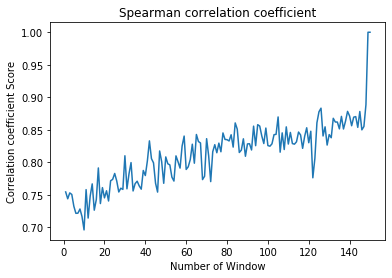

In [45]:
path = r'C:/Users/Rezaul Abedin/Desktop/chunk/input_output_150x967nan' # useing my csv path
all_files = sorted(glob.glob(path + "/*.csv"))
all_files.sort(key=lambda f: int(re.sub('\D', '', f)))
# list sort
#print ("allfile:", all_files)


list_1 = []
list_2 = []
#features = []
cout_j_list = []
spearmanr_score =[]
count = 0
flg = 0
for filename in all_files:
    #print ("filename:", filename)
    count =count+1
    #print ("count",count)
    all_data_ipf2 = pd.read_csv(filename, index_col=False, usecols=["f_name", "score"])
    #print("df:", all_data_ipf2)
    cout_j_list.append(count)
    all_data_ipf2.insert(2, 'Rank2', range(1, 1 + len(all_data_ipf1)))
    #print("df1:", all_data_ipf2)

    two_score_data = all_data_ipf1.copy()
    two_score_data = two_score_data.assign(f_name1=0 , score1=0, Rank3=0)

    for sort_name in all_data_ipf2.f_name.values:
        temp_df = all_data_ipf1.loc[all_data_ipf1['f_name'] == sort_name]
        # print(type(temp_df))
        if not temp_df.empty:
            sort_name_row = all_data_ipf2.loc[all_data_ipf2['f_name'] == sort_name]
            f_name = sort_name_row.iloc[0]['f_name']
            score = sort_name_row.iloc[0]['score']
            Rank2 = sort_name_row.iloc[0]['Rank2']

            two_score_data['score1'] = np.where(two_score_data['f_name'] == str(f_name), score, two_score_data['score1'])
            two_score_data['Rank3'] = np.where(two_score_data['f_name'] == str(f_name), Rank2, two_score_data['Rank3'])
            two_score_data['f_name1'] = np.where(two_score_data['f_name'] == str(f_name), f_name, two_score_data['f_name1'])

    
    two_score_data ["minus"] = two_score_data["Rank1"] - two_score_data["Rank3"]
    two_score_data['Score_Square'] = two_score_data['minus'] ** 2
    length = len(two_score_data.index)
    Total = two_score_data['Score_Square'].sum()
    spearmanr_co = spearmanr_coefficient(length, Total )
    spearmanr_score.append(spearmanr_co)
    #print(spearmanr_score)
    
    
    
    
#     rank1_final = two_score_data.Rank1.values.tolist()
#     score1_final = two_score_data.score1.values.tolist()
#     spearmanr_co = spearmanr_coefficient(rank1_final, score1_final)
#     spearmanr_score.append(spearmanr_co)
#     print(spearmanr_score)
#     print("count", count)
    
plt.title('Spearman correlation coefficient')
plt.xlabel('Number of Window')
plt.ylabel('Correlation coefficient Score')

plt.plot(cout_j_list, spearmanr_score)
plt.savefig('C:/Users/Rezaul Abedin/Desktop/chunk/input_output_150x967nan/corelation/Spearman.png')
plt.show()

In [ ]:
# kendeltau

In [46]:
import math
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from collections import Counter
import re

In [47]:
import scipy.stats as stats
def kendalltau(a, b):

    rank = a #rank
    random = b #random
    tau, p_value = stats.kendalltau(rank, random)
    return tau


In [48]:

all_data_ipf1 = pd.read_csv("C:/Users/Rezaul Abedin/Desktop/chunk/input_output_150x967nan/New folder/data_150.csv", index_col=0 )
all_data_ipf1.insert(2, 'Rank1', range(1, 1 + len(all_data_ipf1)))

[0.6295648978266258]
c: 1
[0.6295648978266258, 0.6273043493124344]
c: 2
[0.6295648978266258, 0.6273043493124344, 0.6372011930910118]
c: 3
[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749]
c: 4
[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428]
c: 5
[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691]
c: 6
[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078]
c: 7
[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308]
c: 8
[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225]
c: 9
[0.6295648978266258, 0.6273043493124344, 0.63720

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183]
c: 29
[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265]
c: 41
[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.60668165152512

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

[0.6295648978266258, 0.6273043493124344, 0.6372011930910118, 0.6291162067226749, 0.6180613125710428, 0.5960412624885691, 0.5934174878426078, 0.615544369140308, 0.6066816515251225, 0.5588169938550686, 0.6513755587272557, 0.6090789439948038, 0.6317741673575087, 0.6565889220303059, 0.6005324467766887, 0.6081601955438564, 0.6728101737502885, 0.6161639901886212, 0.6387096498500091, 0.6456964113258181, 0.6319365508046528, 0.6103651918261301, 0.6499910261779211, 0.647239054073688, 0.6687249480800296, 0.6645328911945441, 0.6326031775876658, 0.6490466382353194, 0.6363550898664183, 0.6934328715376004, 0.6153349799584641, 0.6800148709051596, 0.7085131658789646, 0.6278513251343938, 0.6577897048894511, 0.655918021998684, 0.6556530805849223, 0.6229584554770229, 0.6885058158913571, 0.6413163315015342, 0.7052398574444265, 0.7266744724674593, 0.701120445785295, 0.6996504482637792, 0.6591998769304402, 0.6481706222704626, 0.725755724016512, 0.7059834027024026, 0.6602681890827046, 0.7142008597776203, 0.70

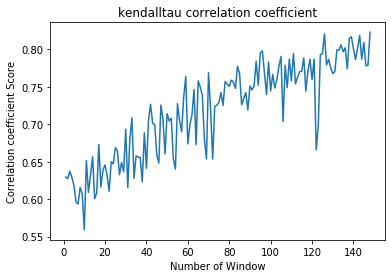

In [49]:
path = r'C:/Users/Rezaul Abedin/Desktop/chunk/input_output_150x967nan' # useing my csv path
all_files = sorted(glob.glob(path + "/*.csv"))
all_files.sort(key=lambda f: int(re.sub('\D', '', f)))
# list sort
#print ("allfile:", all_files)


list_1 = []
list_2 = []
#features = []
cout_j_list = []
kendalltau_score =[]
count = 0
flg = 0
for filename in all_files:
    #print ("filename:", filename)
    count =count+1
    #print ("count",count)
    all_data_ipf2 = pd.read_csv(filename, index_col=False, usecols=["f_name", "score"])
    #print("df:", all_data_ipf2)
    cout_j_list.append(count)
    all_data_ipf2.insert(2, 'Rank2', range(1, 1 + len(all_data_ipf1)))
    #print("df1:", all_data_ipf2)

    two_score_data = all_data_ipf1.copy()
    two_score_data = two_score_data.assign(f_name1=0 , score1=0, Rank3=0)

    for sort_name in all_data_ipf2.f_name.values:
        temp_df = all_data_ipf1.loc[all_data_ipf1['f_name'] == sort_name]
        # print(type(temp_df))
        if not temp_df.empty:
            sort_name_row = all_data_ipf2.loc[all_data_ipf2['f_name'] == sort_name]
            f_name = sort_name_row.iloc[0]['f_name']
            score = sort_name_row.iloc[0]['score']
            Rank2 = sort_name_row.iloc[0]['Rank2']

            two_score_data['score1'] = np.where(two_score_data['f_name'] == str(f_name), score, two_score_data['score1'])
            two_score_data['Rank3'] = np.where(two_score_data['f_name'] == str(f_name), Rank2, two_score_data['Rank3'])
            two_score_data['f_name1'] = np.where(two_score_data['f_name'] == str(f_name), f_name, two_score_data['f_name1'])

    rank1_final = two_score_data.Rank1.values.tolist()
    rank3_final = two_score_data.Rank3.values.tolist()
    kendalltau_co = kendalltau(rank1_final, rank3_final )
    kendalltau_score.append(kendalltau_co)
    print(kendalltau_score)
    print ("c:", count)

plt.title('kendalltau correlation coefficient')
plt.xlabel('Number of Window')
plt.ylabel('Correlation coefficient Score')

plt.plot(cout_j_list, kendalltau_score)
#plt.savefig('C:/Users/Rezaul Abedin/Desktop/chunk/input_output_150x967nan/corelation/kendalltau.png')
plt.show()


In [ ]:
#Pearson correlation coefficient

In [17]:
import math
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from collections import Counter
import re

In [18]:
def pearson_coefficient(a, b):

    a_avg, b_avg = np.average(a), np.average(b)
    a_stdev, b_stdev = np.std(a), np.std(b)
    n = len(a)
    denominator = a_stdev * b_stdev * n
    numerator = np.sum(np.multiply(a - a_avg, b - b_avg))
    p_coef = numerator / denominator
    return p_coef

In [19]:
all_data_ipf1 = pd.read_csv("C:/Users/Rezaul Abedin/Desktop/chunk/molding_machine_30_all/data_30.csv", index_col=0 )
all_data_ipf1.insert(2, 'Rank1', range(1, 1 + len(all_data_ipf1)))

[0.07259995777209816]
count 1
[0.07259995777209816, 0.1357616535341242]
count 2
[0.07259995777209816, 0.1357616535341242, 0.487376849509822]
count 3
[0.07259995777209816, 0.1357616535341242, 0.487376849509822, 0.7829372359888211]
count 4
[0.07259995777209816, 0.1357616535341242, 0.487376849509822, 0.7829372359888211, 0.25481913650890736]
count 5
[0.07259995777209816, 0.1357616535341242, 0.487376849509822, 0.7829372359888211, 0.25481913650890736, 1.0]
count 6


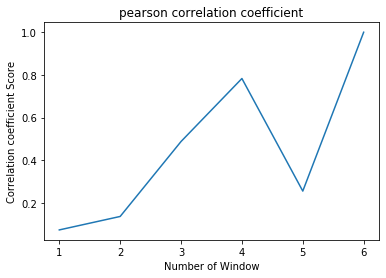

In [20]:
path = r'C:/Users/Rezaul Abedin/Desktop/chunk/molding_machine_30_all' # useing my csv path
all_files = sorted(glob.glob(path + "/*.csv"))
all_files.sort(key=lambda f: int(re.sub('\D', '', f)))
# list sort
#print ("allfile:", all_files)


list_1 = []
list_2 = []
#features = []
cout_j_list = []
pearson_score =[]
count = 0
flg = 0
for filename in all_files:
    #print ("filename:", filename)
    count =count+1
    #print ("count",count)
    all_data_ipf2 = pd.read_csv(filename, index_col=False, usecols=["f_name", "score"])
    #print("df:", all_data_ipf2)
    cout_j_list.append(count)
    all_data_ipf2.insert(2, 'Rank2', range(1, 1 + len(all_data_ipf1)))
    #print("df1:", all_data_ipf2)

    two_score_data = all_data_ipf1.copy()
    two_score_data = two_score_data.assign(f_name1=0 , score1=0, Rank3=0)

    for sort_name in all_data_ipf2.f_name.values:
        temp_df = all_data_ipf1.loc[all_data_ipf1['f_name'] == sort_name]
        # print(type(temp_df))
        if not temp_df.empty:
            sort_name_row = all_data_ipf2.loc[all_data_ipf2['f_name'] == sort_name]
            f_name = sort_name_row.iloc[0]['f_name']
            score = sort_name_row.iloc[0]['score']
            Rank2 = sort_name_row.iloc[0]['Rank2']

            two_score_data['score1'] = np.where(two_score_data['f_name'] == str(f_name), score, two_score_data['score1'])
            two_score_data['Rank3'] = np.where(two_score_data['f_name'] == str(f_name), Rank2, two_score_data['Rank3'])
            two_score_data['f_name1'] = np.where(two_score_data['f_name'] == str(f_name), f_name, two_score_data['f_name1'])


    #print(two_score_data)

    score1_final = two_score_data.score.values.tolist()
    score2_final = two_score_data.score1.values.tolist()
    pearson_co = pearson_coefficient(score1_final, score2_final)
    pearson_score.append(pearson_co)
    print(pearson_score)
    print("count", count)
    
plt.title('pearson correlation coefficient')
plt.xlabel('Number of Window')
plt.ylabel('Correlation coefficient Score')

plt.plot(cout_j_list, pearson_score)
plt.savefig('C:/Users/Rezaul Abedin/Desktop/chunk/input_output_150x967nan/corelation/pearson5.png')
plt.show()

In [16]:
#pearson corelation 1 to 150
import math
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from collections import Counter
import re

In [17]:
def pearson_coefficient(a, b):

    a_avg, b_avg = np.average(a), np.average(b)
    a_stdev, b_stdev = np.std(a), np.std(b)
    n = len(a)
    denominator = a_stdev * b_stdev * n
    numerator = np.sum(np.multiply(a - a_avg, b - b_avg))
    p_coef = numerator / denominator
    return p_coef

In [18]:
all_data_ipf1 = pd.read_csv("C:/Users/Rezaul Abedin/Desktop/chunk/input_output_150x967/New folder/data_1.csv", index_col=0 )
all_data_ipf1.insert(2, 'Rank1', range(1, 1 + len(all_data_ipf1)))

[0.44990251315081714]
count 1
[0.44990251315081714, 0.706334622992679]
count 2
[0.44990251315081714, 0.706334622992679, 0.6928787653192829]
count 3
[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755]
count 4
[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257]
count 5
[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179]
count 6
[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691]
count 7
[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672]
count 8
[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353]
count 9
[0.4499025131

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228]
count 29
[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605]
count 41
[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

[0.44990251315081714, 0.706334622992679, 0.6928787653192829, 0.7378293475281755, 0.48465571647977257, 0.8368939680850179, 0.8408532176778691, 0.8503450700053672, 0.9253261954233353, 0.8003647071439818, 0.8343549748861028, 0.8989009801634383, 0.9149103858150514, 0.9742035390293482, 0.9717822595930434, 0.8303989028073873, 0.8892390497681428, 0.9439802834627934, 0.955506740634018, 0.982504276366474, 0.9680996823310475, 0.9449554763458394, 0.9195882500525012, 0.9945794952178636, 0.9948462929282136, 0.9957304806626736, 0.979922920306826, 0.9772363364460176, 0.9741209091019228, 0.9428894067248597, 0.96964566153925, 0.9742465119932372, 0.9462853497212718, 0.1920907444176082, 0.9927286267939155, 0.9902978572875435, 0.9939958176434119, 0.9024957495541982, 0.9481239420052467, 0.9498413596438733, 0.9103718489548605, 0.9791371575553969, 0.9609089113124131, 0.9644884538515867, 0.987034593298356, 0.8879598202892466, 0.9536723188064556, 0.9060459253888985, 0.9606193421340748, 0.9656267412417844, 0.91

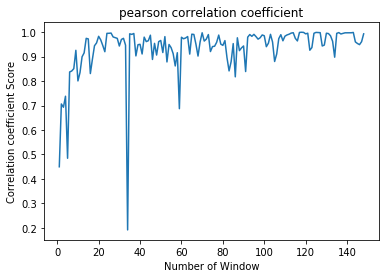

In [19]:
path = r'C:/Users/Rezaul Abedin/Desktop/chunk/input_output_150x967' # useing my csv path
all_files = sorted(glob.glob(path + "/*.csv"))
all_files.sort(key=lambda f: int(re.sub('\D', '', f)))
# list sort
#print ("allfile:", all_files)


list_1 = []
list_2 = []
#features = []
cout_j_list = []
pearson_score =[]
count = 0
flg = 0
for filename in all_files:
    #print ("filename:", filename)
    count =count+1
    #print ("count",count)
    all_data_ipf2 = pd.read_csv(filename, index_col=False, usecols=["f_name", "score"])
    #print("df:", all_data_ipf2)
    cout_j_list.append(count)
    all_data_ipf2.insert(2, 'Rank2', range(1, 1 + len(all_data_ipf1)))
    #print("df1:", all_data_ipf2)

    two_score_data = all_data_ipf1.copy()
  
    two_score_data = two_score_data.assign(f_name1=0 , score1=0, Rank3=0)

    for sort_name in all_data_ipf2.f_name.values:
        temp_df = all_data_ipf1.loc[all_data_ipf1['f_name'] == sort_name]
        # print(type(temp_df))
        if not temp_df.empty:
            sort_name_row = all_data_ipf2.loc[all_data_ipf2['f_name'] == sort_name]
            f_name = sort_name_row.iloc[0]['f_name']
            score = sort_name_row.iloc[0]['score']
            Rank2 = sort_name_row.iloc[0]['Rank2']

            two_score_data['score1'] = np.where(two_score_data['f_name'] == str(f_name), score, two_score_data['score1'])
            two_score_data['Rank3'] = np.where(two_score_data['f_name'] == str(f_name), Rank2, two_score_data['Rank3'])
            two_score_data['f_name1'] = np.where(two_score_data['f_name'] == str(f_name), f_name, two_score_data['f_name1'])

    all_data_ipf1 = all_data_ipf2.copy()
    #print(two_score_data)

    score1_final = two_score_data.score.values.tolist()
    score2_final = two_score_data.score1.values.tolist()
    pearson_co = pearson_coefficient(score1_final, score2_final)
    pearson_score.append(pearson_co)
    print(pearson_score)
    print("count", count)
    
plt.title('pearson correlation coefficient')
plt.xlabel('Number of Window')
plt.ylabel('Correlation coefficient Score')

plt.plot(cout_j_list, pearson_score)
plt.savefig('C:/Users/Rezaul Abedin/Desktop/chunk/input_output_150x967/corelation/pearson1-150.png')
plt.show()

In [11]:
plt.savefig('C:/Users/Rezaul Abedin/Desktop/chunk/input_output_150x967nan/New folder/pearson.png')

<Figure size 432x288 with 0 Axes>